<a href="https://colab.research.google.com/github/Henil21/Intro_to_computer_vision_and_CNN/blob/main/Multiclass_classification_ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile 
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip


--2022-11-13 04:24:28--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.203.128, 74.125.199.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   226MB/s    in 2.2s    

2022-11-13 04:24:30 (226 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
zip_ref=zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

In [3]:
import os

for folderpath, subfolder, filenames in os.walk("10_food_classes_all_data"):
  print(f"there are {len(subfolder)}subfolder with {len(filenames)} images in {folderpath} ")
  

there are 2subfolder with 0 images in 10_food_classes_all_data 
there are 10subfolder with 0 images in 10_food_classes_all_data/train 
there are 0subfolder with 750 images in 10_food_classes_all_data/train/hamburger 
there are 0subfolder with 750 images in 10_food_classes_all_data/train/steak 
there are 0subfolder with 750 images in 10_food_classes_all_data/train/chicken_wings 
there are 0subfolder with 750 images in 10_food_classes_all_data/train/chicken_curry 
there are 0subfolder with 750 images in 10_food_classes_all_data/train/ice_cream 
there are 0subfolder with 750 images in 10_food_classes_all_data/train/sushi 
there are 0subfolder with 750 images in 10_food_classes_all_data/train/fried_rice 
there are 0subfolder with 750 images in 10_food_classes_all_data/train/ramen 
there are 0subfolder with 750 images in 10_food_classes_all_data/train/pizza 
there are 0subfolder with 750 images in 10_food_classes_all_data/train/grilled_salmon 
there are 10subfolder with 0 images in 10_food_

In [4]:
import pathlib
import numpy as np
data_dir=pathlib.Path("/content/10_food_classes_all_data/train")
class_name=np.array(sorted([item.name for item in data_dir.glob("*")])) # created a list of class_name from the subdirectories
print(class_name)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_images(target_dir,target_class):
  target=target_dir+target_class
  img=random.sample(os.listdir(target),1)
  print(img)
  image=mpimg.imread(target+'/'+img[0])
  plt.imshow(image)
  print(f"img shape:{image.shape}")
  plt.axis("off")
  print(target)
  return img

['3808946.jpg']
img shape:(512, 512, 3)
10_food_classes_all_data/train/sushi


['3808946.jpg']

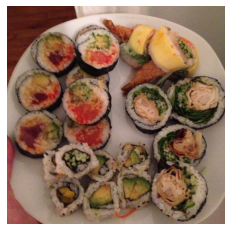

In [6]:
import random
view_random_images(target_dir='10_food_classes_all_data/train/',
                   target_class=random.choice(class_name))

In [7]:
train='10_food_classes_all_data/train'
test='10_food_classes_all_data/test'


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen= ImageDataGenerator(rescale=1/225)
test_datagen= ImageDataGenerator(rescale=1/225)


train_data=train_datagen.flow_from_directory(train,
                                             target_size=(224,224),
                                             batch_size=(32),
                                             class_mode='categorical')
test_data=train_datagen.flow_from_directory(test,
                                             target_size=(224,224),
                                             batch_size=(32),
                                             class_mode='categorical')


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPool2D,Conv2D , Flatten ,Dense
from tensorflow.keras.optimizers import Adam

model=Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(),
              metrics=['accuracy'])
history=model.fit(train_data,
          epochs=5,
          steps_per_epoch=len(train_data),
          validation_data=(test_data),
          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 54s 193ms/step - loss: 2.1016 - accuracy: 0.2364 - val_loss: 1.9726 - val_accuracy: 0.2832
Epoch 2/5
235/235 [==============================] - 45s 192ms/step - loss: 1.8817 - accuracy: 0.3483 - val_loss: 1.8813 - val_accuracy: 0.3268
Epoch 3/5
235/235 [==============================] - 46s 194ms/step - loss: 1.7411 - accuracy: 0.4061 - val_loss: 1.8789 - val_accuracy: 0.3684
Epoch 4/5
235/235 [==============================] - 45s 190ms/step - loss: 1.5659 - accuracy: 0.4715 - val_loss: 1.8696 - val_accuracy: 0.3544
Epoch 5/5
235/235 [==============================] - 44s 189ms/step - loss: 1.3368 - accuracy: 0.5576 - val_loss: 2.0142 - val_accuracy: 0.3516


In [10]:
def plot_loss_curves(history):
  """
  return separate loss curves for traning and validation metrics
  """
  loss= history.history['loss']
  val_loss=history.history['val_loss']
  accuracy=history.history['accuracy']
  val_accuracy=history.history['val_accuracy']
  # how many epoch we run
  epoch=range(len(history.history["loss"]))
  plt.plot(epoch,loss,label="traning_loss")
  plt.plot(epoch,val_loss,label="val_loss")
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()


  plt.figure()
   
  plt.plot(epoch,accuracy,label="accuracy")
  plt.plot(epoch,val_accuracy,label="val_accuracy")
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

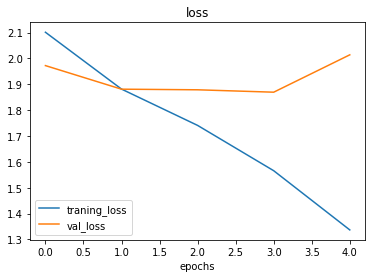

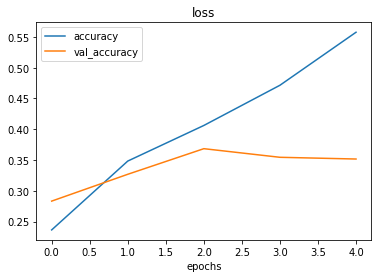

In [11]:
plot_loss_curves(history)

>**oh! our model is overfitting lets fix it**

In [12]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                            #  rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [13]:
import tensorflow as tf

In [14]:
# Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model)

# Compile the cloned model (same setup as used for model_10)
model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 110s 466ms/step - loss: 2.2176 - accuracy: 0.1769 - val_loss: 2.0148 - val_accuracy: 0.2792
Epoch 2/5
235/235 [==============================] - 110s 469ms/step - loss: 2.0731 - accuracy: 0.2637 - val_loss: 1.9465 - val_accuracy: 0.3180
Epoch 3/5
235/235 [==============================] - 111s 471ms/step - loss: 2.0074 - accuracy: 0.2917 - val_loss: 1.8488 - val_accuracy: 0.3476
Epoch 4/5
235/235 [==============================] - 109s 463ms/step - loss: 1.9470 - accuracy: 0.3261 - val_loss: 1.7923 - val_accuracy: 0.3720
Epoch 5/5
235/235 [==============================] - 110s 467ms/step - loss: 1.9168 - accuracy: 0.3429 - val_loss: 1.8410 - val_accuracy: 0.3704


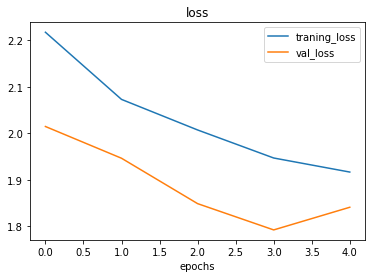

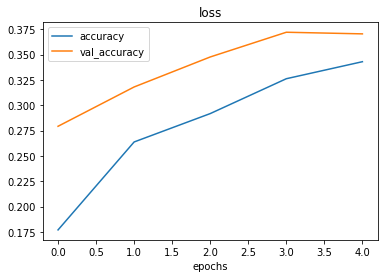

In [15]:
plot_loss_curves(history_11)

In [16]:
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-sushi.jpeg

--2022-11-13 05:09:47--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-sushi.jpeg
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-sushi.jpeg’

03-sushi.jpeg           [ <=>                ] 137.25K  --.-KB/s    in 0.02s   

2022-11-13 05:09:47 (6.57 MB/s) - ‘03-sushi.jpeg’ saved [140546]

